In [1]:
import pandas as pd
from scipy import stats

In [2]:
carros = pd.read_csv('cars.csv')
carros

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16
5,6,9,10
6,7,10,18
7,8,10,26
8,9,10,34
9,10,11,17


In [4]:
carros = carros.drop(['Unnamed: 0'], axis=1)#apagando a coluna Unnamed
carros

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


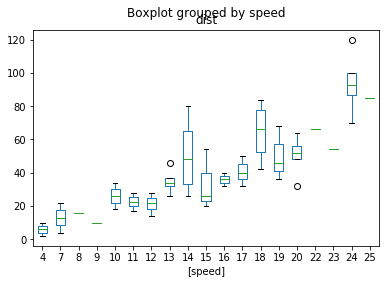

In [7]:
boxplot = carros.boxplot(by='speed', grid=False)

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:
modelo1 = ols('speed ~ dist', data=carros).fit()

In [10]:
resultado1 = sm.stats.anova_lm(modelo1)
resultado1

,df,sum_sq,mean_sq,F,PR(>F)
dist,1.0,891.978752,891.978752,89.567107,1.489836e-12
Residual,48.0,478.021248,9.958776,NaN,NaN


In [11]:
from statsmodels.stats.multicomp import MultiComparison

In [12]:
mc = MultiComparison(carros['speed'], carros['dist'])

In [13]:
resultado_teste = mc.tukeyhsd()
print(resultado_teste)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  2      4      3.0    -14.7915 20.7915 False 
  2      10     2.5    -12.9079 17.9079 False 
  2      14     8.0    -9.7915  25.7915 False 
  2      16     4.0    -13.7915 21.7915 False 
  2      17     7.0    -10.7915 24.7915 False 
  2      18     6.0    -11.7915 23.7915 False 
  2      20     9.5    -5.9079  24.9079 False 
  2      22     3.0    -14.7915 20.7915 False 
  2      24     8.0    -9.7915  25.7915 False 
  2      26     9.0    -5.0654  23.0654 False 
  2      28     7.5    -7.9079  22.9079 False 
  2      32   13.6667   -0.86   28.1934 False 
  2      34     8.0    -6.5267  22.5267 False 
  2      36     12.5   -2.9079  27.9079 False 
  2      40     12.5   -2.9079  27.9079 False 
  2      42     14.0   -3.7915  31.7915 False 
  2      46     12.0   -3.4079  27.4079 False 
  2      48     16.0   -1.7915  33.7915 False 
  2      

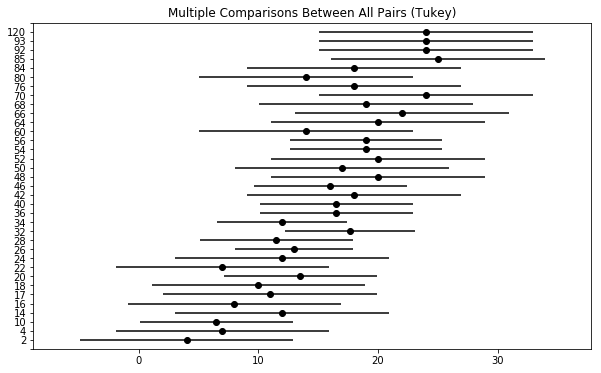

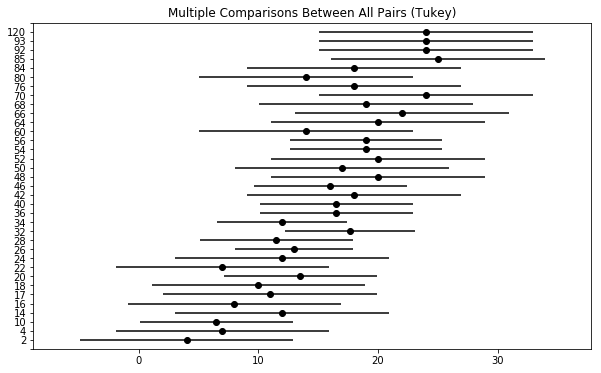

In [14]:
resultado_teste.plot_simultaneous()